### <center>📜 **<font color="blue">Question 6:</font> Regression analysis about the cost of houses** </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/processed/VN_housing_dataset.csv')  
df.head()

,date,address,district,town,house_type,paper_type,num_floors,num_rooms,squares,price_per_m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5,46,86.96
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Chưa có sổ,0,3,37,116.22
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4,40,65.00
3,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,0,6,51,100.00
4,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",Chưa có sổ,0,4,36,86.11


In [3]:
df = df.drop(['date', 'address'], axis=1)

In [4]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import OrdinalEncoder

# Encode categorical variables
oe = OrdinalEncoder()
df[['district', 'house_type', 'town']] = oe.fit_transform(df[['district', 'house_type', 'town']]).astype(int)
  

c:\Users\tn861\anaconda3\envs\thangDS\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


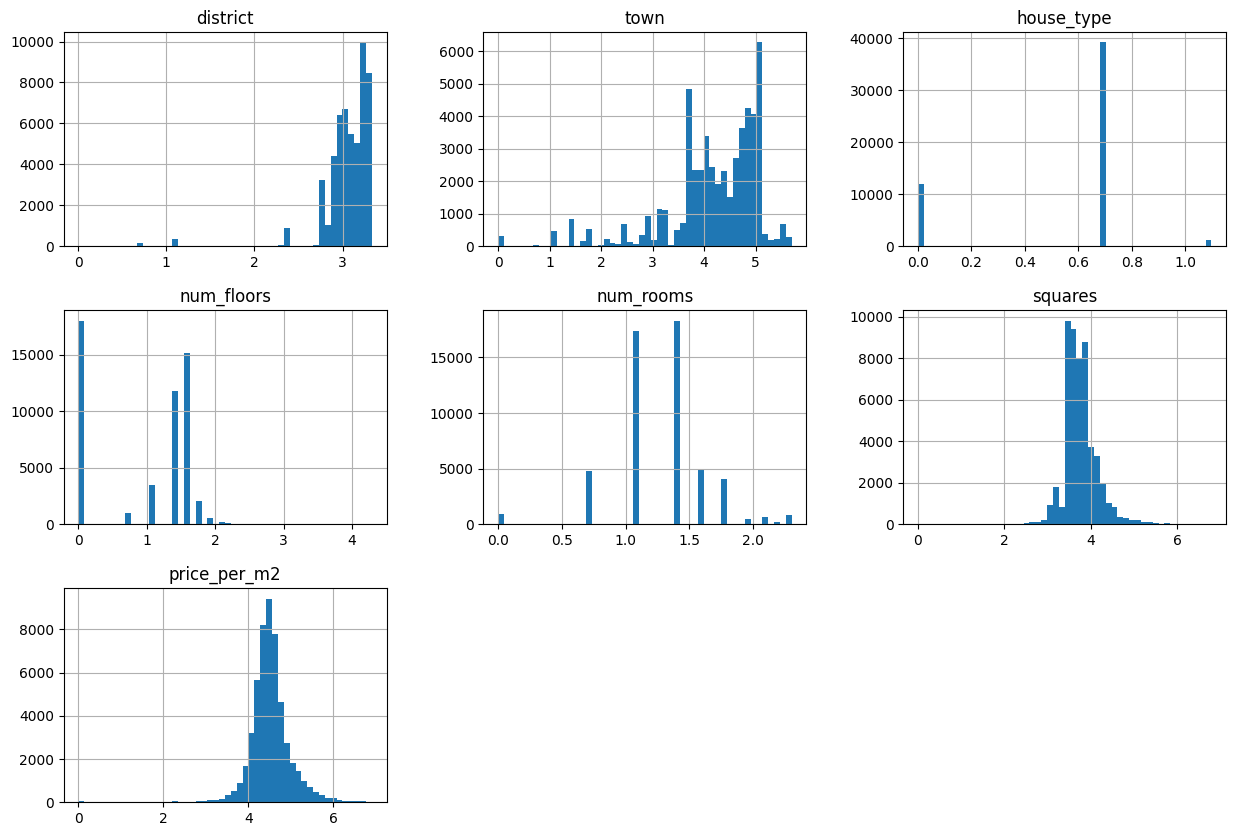

In [12]:
# log transformation
df_log = df.copy()

df_log[['district', 'house_type', 'town', 'price_per_m2', 'num_floors', 'num_rooms', 'squares']] = np.log(df[['district', 'house_type', 'town','price_per_m2','num_floors','num_rooms', 'squares']])

# replace inf with 0
df_log = df_log.replace([np.inf, -np.inf], 0)
 
df_paper_log = df_log[df_log['paper_type'] == 'Đã có sổ'].drop(['paper_type'], axis=1)
df_no_paper_log = df_log[df_log['paper_type'] != 'Đã có sổ'].drop(['paper_type'], axis=1)

df_paper_log.hist(bins=50, figsize=(15,10))
plt.show()

In [13]:
import statsmodels.api as sm

X = df_paper_log.drop(['price_per_m2'], axis=1)
y = df_paper_log['price_per_m2']

model1 = sm.OLS(y, X).fit()
model1.summary()

df_paper_log['predicted_price'] = model1.predict(X)

In [14]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           price_per_m2   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          6.376e+05
Date:                Thu, 18 May 2023   Prob (F-statistic):                        0.00
Time:                        10:54:51   Log-Likelihood:                         -40896.
No. Observations:               52421   AIC:                                  8.180e+04
Df Residuals:                   52415   BIC:                                  8.186e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
district       0.8734      0.006    154.917      0.000       0.862       0.884
town           0.0712      0.002     30.811      0.000       0.067       0.076
house_type    -0.2280      0.008    -29.873      0.000      -0.243      -0.213
num_floors     0.0725      0.003     22.439      0.000       0.066       0.079
num_rooms      0.2688      0.007     39.263      0.000       0.255       0.282
squares        0.3307      0.005     66.712      0.000       0.321       0.340
==============================================================================
Omnibus:                    18681.279   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           392116.708
Skew:                          -1.206   Prob(JB):                         0.00
Kurtosis:                      16.180   Cond. No.                         23.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
X = df_no_paper_log.drop(['price_per_m2'], axis=1)
y = df_no_paper_log['price_per_m2']

model2 = sm.OLS(y, X).fit()

df_no_paper_log['predicted_price'] = model2.predict(X)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           price_per_m2   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          3.935e+05
Date:                Thu, 18 May 2023   Prob (F-statistic):                        0.00
Time:                        10:54:56   Log-Likelihood:                         -21038.
No. Observations:               29009   AIC:                                  4.209e+04
Df Residuals:                   29003   BIC:                                  4.214e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
district       0.9294      0.007    123.969      0.000       0.915       0.944
town           0.0593      0.003     19.737      0.000       0.053       0.065
house_type    -0.1965      0.010    -19.322      0.000      -0.216      -0.177
num_floors    -0.0127      0.010     -1.240      0.215      -0.033       0.007
num_rooms      0.2901      0.009     33.481      0.000       0.273       0.307
squares        0.3012      0.006     47.016      0.000       0.289       0.314
==============================================================================
Omnibus:                     9578.868   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           217205.755
Skew:                          -1.057   Prob(JB):                         0.00
Kurtosis:                      16.238   Cond. No.                         24.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""